In [1]:
import torch 
from dataloader import ECG_Data, prepare_dataset
from resnet_1d import SERes1d
from sklearn.model_selection import train_test_split



In [2]:
# final_data=prepare_dataset(".\\sample_dataset\\ptbxl_database.csv")
final_data=prepare_dataset(r"sample_dataset/ptbxl_database.csv")


    #split zrobiłem sklearnem bo po co się męczyć
ECG_train,ECG_test=train_test_split(final_data,test_size=0.2,random_state=42)

    #inaczej nie działa xd
ECG_train=ECG_train.reset_index()
ECG_test=ECG_test.reset_index()
    #tu ważne żeby podać ścieżkę do folderu z danymi, ale tylko folderu, bo potem to już się samo sklei
train_dataset=ECG_Data(ECG_train, r"sample_dataset/")
train_loader=torch.utils.data.DataLoader(train_dataset,batch_size=2)
test_dataset=ECG_Data(ECG_test, r"sample_dataset/")
test_loader=torch.utils.data.DataLoader(test_dataset,batch_size=2)

In [3]:
for data, label in train_loader:
    print(data.shape)
    print(label.shape)

torch.Size([2, 1, 1000])
torch.Size([2])
torch.Size([2, 1, 1000])
torch.Size([2])
torch.Size([2, 1, 1000])
torch.Size([2])
torch.Size([2, 1, 1000])
torch.Size([2])
torch.Size([2, 1, 1000])
torch.Size([2])
torch.Size([1, 1, 1000])
torch.Size([1])


In [50]:
model = SERes1d(1,5)


for data,label in train_loader:
    out = model(data)
    print (label)
    print(out)
    



tensor([0, 4])
tensor([[ 0.1153,  0.1037,  0.2731, -0.1460,  0.0870],
        [ 0.1565,  0.0127, -0.0769, -0.1774, -0.2589]],
       grad_fn=<AddmmBackward0>)
tensor([2, 0])
tensor([[-0.0027,  0.0617,  0.1937, -0.2124, -0.1614],
        [ 0.3259,  0.0477,  0.0910, -0.1401, -0.0829]],
       grad_fn=<AddmmBackward0>)
tensor([0, 2])
tensor([[ 0.1958,  0.0576,  0.2064, -0.1829, -0.1511],
        [ 0.2063,  0.0718,  0.0357, -0.1591, -0.1199]],
       grad_fn=<AddmmBackward0>)
tensor([2, 3])
tensor([[ 0.2511, -0.0047,  0.0442, -0.1219, -0.2417],
        [ 0.0748,  0.1378,  0.2292, -0.2951,  0.0242]],
       grad_fn=<AddmmBackward0>)
tensor([1, 3])
tensor([[ 0.2411,  0.0245,  0.1879, -0.0865, -0.1021],
        [ 0.1543,  0.1433,  0.0840, -0.2943, -0.1409]],
       grad_fn=<AddmmBackward0>)
tensor([1])
tensor([[ 0.2148,  0.0679,  0.1460, -0.2094, -0.1192]],
       grad_fn=<AddmmBackward0>)


In [51]:
import numpy as np

In [52]:
# create training loop 
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
losses = np.array([])
accuracies = np.array([])
for epoch in range(50):
    running_loss = 0.0
    train_acc = 0.0
    for data, label in train_loader:
        out = model(data)
        loss = criterion(out, label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_acc += torch.sum(torch.sigmoid(out).argmax(dim=1) == label)
        print("out",torch.sigmoid(out).argmax(dim=1))
        print("target",label)
        print(torch.sigmoid(out).argmax(dim=1) == label)
        running_loss += loss.item()*data.size(0)
    accuracies = np.append(accuracies,train_acc/len(train_loader.dataset))
    losses = np.append(losses, running_loss/len(train_loader.dataset))

    print(f"Epoch: {epoch}, Loss: {loss}")

out tensor([2, 0])
target tensor([0, 4])
tensor([False, False])
out tensor([4, 0])
target tensor([2, 0])
tensor([False,  True])
out tensor([4, 0])
target tensor([0, 2])
tensor([False, False])
out tensor([4, 0])
target tensor([2, 3])
tensor([False, False])
out tensor([4, 0])
target tensor([1, 3])
tensor([False, False])
out tensor([2])
target tensor([1])
tensor([False])
Epoch: 0, Loss: 2.0155816078186035
out tensor([2, 3])
target tensor([0, 4])
tensor([False, False])
out tensor([2, 4])
target tensor([2, 0])
tensor([ True, False])
out tensor([4, 2])
target tensor([0, 2])
tensor([False,  True])
out tensor([4, 2])
target tensor([2, 3])
tensor([False, False])
out tensor([2, 0])
target tensor([1, 3])
tensor([False, False])
out tensor([2])
target tensor([1])
tensor([False])
Epoch: 1, Loss: 1.5378602743148804
out tensor([2, 0])
target tensor([0, 4])
tensor([False, False])
out tensor([2, 0])
target tensor([2, 0])
tensor([True, True])
out tensor([0, 2])
target tensor([0, 2])
tensor([True, True])


In [38]:
import matplotlib.pyplot as plt

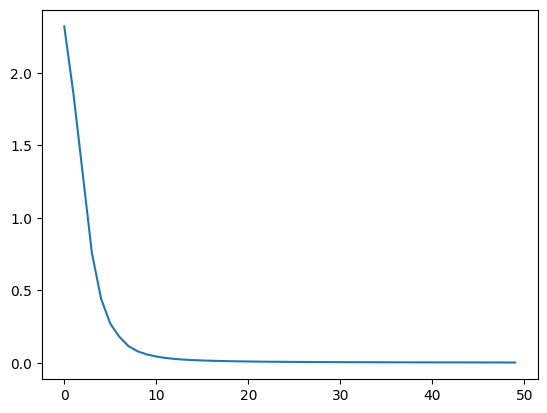

In [53]:
plt.plot(losses)

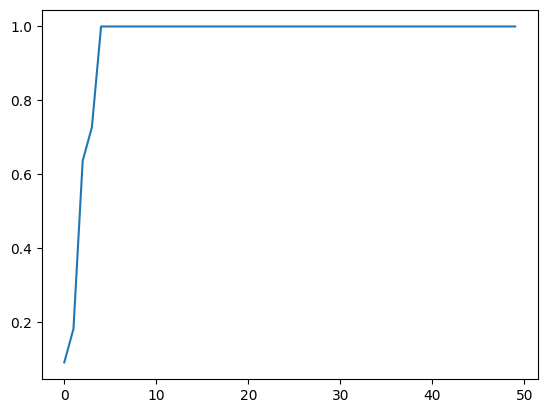

In [54]:
plt.plot(accuracies)